In [1]:
IMG_DIMEN = 224
N_COLORS = 1   

In [2]:
from tqdm import tqdm
import numpy as np
import os
import cv2

In [3]:
from tqdm import tqdm
import numpy as np
import os

def read_data(dir_path):
    X = []
    y = []
    y_map = {'Normal': 0, 'COVID': 1}
    for class_name in y_map.keys():
        subdir_path = os.path.join(dir_path, class_name)
        filenames = os.listdir(subdir_path)
        for fname in tqdm(filenames):
            if fname.endswith('.png'):
                img_path = os.path.join(subdir_path, fname)
                img = cv2.imread(img_path)
                img = cv2.resize(img, dsize=(IMG_DIMEN, IMG_DIMEN))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = img.reshape((1, IMG_DIMEN, IMG_DIMEN, N_COLORS))
                X.append(img)
                y.append(y_map[class_name])
    X = np.vstack(X).astype('float32')/255.0
    y = np.array(y).astype('int32')
    return X, y

#####  We read training data in (X, y) which we will split into (X_train, y_train) and (X_val, y_val)
#####  We read test data in X_test, y_test

In [4]:
X, y = read_data('data/train')

100%|██████████| 84/84 [00:02<00:00, 37.23it/s]


In [5]:
X_test, y_test = read_data('data/test')

100%|██████████| 60/60 [00:00<00:00, 60.48it/s]


## Splitting X, y to train and validation

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=0)

In [7]:
print(X_train.shape)
print(y_train.shape)
print('--------------')
print(X_val.shape)
print(y_val.shape)

(117, 224, 224, 1)
(117,)
--------------
(51, 224, 224, 1)
(51,)


## Visualizing an example image

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

def imshow(img):
    plt.figure(figsize=(6, 6))
    if N_COLORS == 3:
        plt.imshow(img)
    elif N_COLORS == 1:
         plt.imshow(img, cmap='gray')
    plt.show()

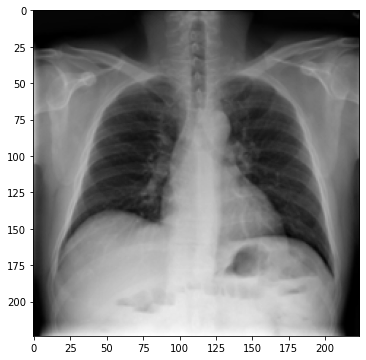

In [9]:
imshow(X_train[9])

## Building CNN

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense

In [11]:
model = Sequential()
model.add(Conv2D(16, 7, activation='relu', input_shape=(IMG_DIMEN, IMG_DIMEN, N_COLORS)))
model.add(Conv2D(16, 7, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(32, 5, activation='relu'))
model.add(Conv2D(32, 5, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training (and validation)

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'saved-model/best-model', monitor='val_loss', mode='min', 
    save_weights_only=True, save_best_only=True, verbose=1
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=120,
    callbacks=[checkpoint]
)

Epoch 1/120
4/4 [==============================] - 26s 6s/step - loss: 0.6944 - accuracy: 0.4103 - val_loss: 0.6939 - val_accuracy: 0.4706

Epoch 00001: val_loss improved from inf to 0.69391, saving model to saved-model\best-model
Epoch 2/120
4/4 [==============================] - 23s 6s/step - loss: 0.6934 - accuracy: 0.4872 - val_loss: 0.6929 - val_accuracy: 0.5294

Epoch 00002: val_loss improved from 0.69391 to 0.69294, saving model to saved-model\best-model
Epoch 3/120
4/4 [==============================] - 22s 6s/step - loss: 0.6932 - accuracy: 0.4872 - val_loss: 0.6930 - val_accuracy: 0.5294

Epoch 00003: val_loss did not improve from 0.69294
Epoch 4/120
4/4 [==============================] - 23s 6s/step - loss: 0.6935 - accuracy: 0.4786 - val_loss: 0.6934 - val_accuracy: 0.4706

Epoch 00004: val_loss did not improve from 0.69294
Epoch 5/120
4/4 [==============================] - 22s 6s/step - loss: 0.6931 - accuracy: 0.5128 - val_loss: 0.6934 - val_accuracy: 0.4706

Epoch 00005:

Epoch 43/120
4/4 [==============================] - 19s 5s/step - loss: 0.6900 - accuracy: 0.6068 - val_loss: 0.6895 - val_accuracy: 0.5882

Epoch 00043: val_loss improved from 0.68967 to 0.68946, saving model to saved-model\best-model
Epoch 44/120
4/4 [==============================] - 19s 5s/step - loss: 0.6869 - accuracy: 0.6667 - val_loss: 0.6852 - val_accuracy: 0.6275

Epoch 00044: val_loss improved from 0.68946 to 0.68519, saving model to saved-model\best-model
Epoch 45/120
4/4 [==============================] - 19s 5s/step - loss: 0.6736 - accuracy: 0.6923 - val_loss: 0.6712 - val_accuracy: 0.6471

Epoch 00045: val_loss improved from 0.68519 to 0.67122, saving model to saved-model\best-model
Epoch 46/120
4/4 [==============================] - 20s 5s/step - loss: 0.6037 - accuracy: 0.7179 - val_loss: 0.6946 - val_accuracy: 0.6667

Epoch 00046: val_loss did not improve from 0.67122
Epoch 47/120
4/4 [==============================] - 20s 5s/step - loss: 0.5858 - accuracy: 0.7521 - 

4/4 [==============================] - 20s 5s/step - loss: 0.4386 - accuracy: 0.8120 - val_loss: 0.6525 - val_accuracy: 0.6863

Epoch 00084: val_loss did not improve from 0.60152
Epoch 85/120
4/4 [==============================] - 20s 5s/step - loss: 0.5108 - accuracy: 0.7607 - val_loss: 0.6127 - val_accuracy: 0.6471

Epoch 00085: val_loss did not improve from 0.60152
Epoch 86/120
4/4 [==============================] - 20s 5s/step - loss: 0.4141 - accuracy: 0.8205 - val_loss: 0.7727 - val_accuracy: 0.6667

Epoch 00086: val_loss did not improve from 0.60152
Epoch 87/120
4/4 [==============================] - 19s 5s/step - loss: 0.4927 - accuracy: 0.7863 - val_loss: 0.5975 - val_accuracy: 0.6667

Epoch 00087: val_loss improved from 0.60152 to 0.59748, saving model to saved-model\best-model
Epoch 88/120
4/4 [==============================] - 20s 5s/step - loss: 0.4469 - accuracy: 0.7863 - val_loss: 0.6544 - val_accuracy: 0.6863

Epoch 00088: val_loss did not improve from 0.59748
Epoch 89/

In [13]:
plt.show()

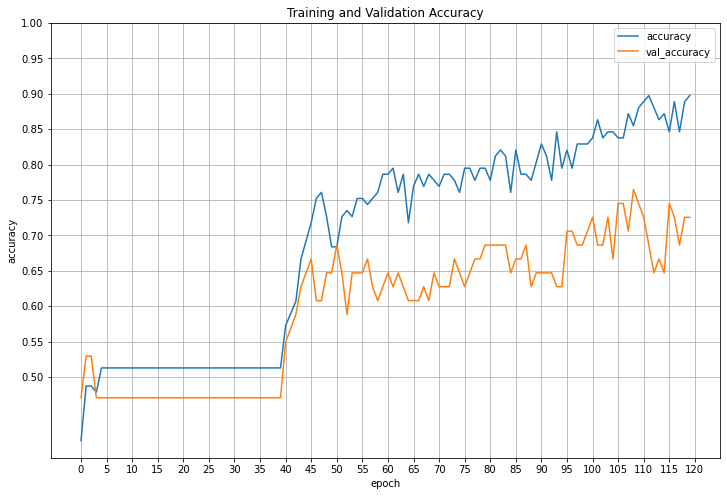

In [14]:
import pandas as pd
hist_df = pd.DataFrame(history.history)
hist_df.plot(y=['accuracy', 'val_accuracy'], figsize=(12, 8))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy')
plt.grid(axis='both')
plt.xticks(np.arange(0, 121, 5))
plt.yticks(np.arange(0.5, 1.01, 0.05))
plt.show()

In [15]:
model.load_weights('saved-model/best-model')
model.evaluate(X_test, y_test)

5/5 [==============================] - 3s 570ms/step - loss: 0.5083 - accuracy: 0.7348


[0.5083346962928772, 0.7348484992980957]